sourcode ke 1

In [38]:
from queue import PriorityQueue
v = 14
graph = [[] for i in range(v)]
 
def best_first_search(actual_Src, target, n):
    visited = [False] * n
    pq = PriorityQueue()
    pq.put((0, actual_Src))
    visited[actual_Src] = True
     
    while pq.empty() == False:
        u = pq.get()[1]
        print(u, end=" ")
        if u == target:
            break
 
        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c, v))
    print()
 
 
def addedge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))
 

addedge(0, 1, 3)
addedge(0, 2, 6)
addedge(0, 3, 5)
addedge(1, 4, 9)
addedge(1, 5, 8)
addedge(2, 6, 12)
addedge(2, 7, 14)
addedge(3, 8, 7)
addedge(8, 9, 5)
addedge(8, 10, 6)
addedge(9, 11, 1)
addedge(9, 12, 10)
addedge(9, 13, 2)
 
source = 0
target = 9
best_first_search(source, target, v)

0 1 3 2 8 9 


sourcode ke 2


1 Arad
2 Bucharest
3 Craiova
4 Dobreta
5 Eforie
6 Fagaras
7 Giurgiu
8 Hirsova
9 Iasi
10 Lugoj
11 Mehadia
12 Neamt
13 Oradea
14 Pitesti
15 Rimnicu_Vilcea
16 Sibiu
17 Timisoara
18 Urziceni
19 Vaslui
20 Zerind
Masukan nomor KOTA ASAL (0 untuk keluar): 12
GBFS =>  ['Neamt', 'Iasi', 'Vaslui', 'Urziceni', 'Bucharest']
Masukan nomor KOTA ASAL (0 untuk keluar): 0


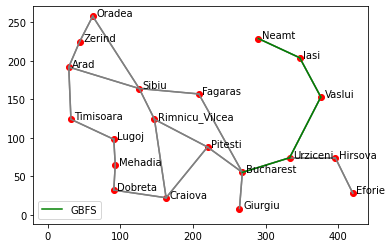

In [47]:
import queue
import matplotlib.pyplot as plt

# getting heuristics from file
def getHeuristics():
    heuristics = {}
    f = open("/content/heuristics.txt")
    for i in f.readlines():
        node_heuristic_val = i.split()
        heuristics[node_heuristic_val[0]] = int(node_heuristic_val[1])

    return heuristics
# getting cities location from file
def getCity():
    city = {}
    citiesCode = {}
    f = open("/content/cities.txt")
    j = 1
    for i in f.readlines():
        node_city_val = i.split()
        city[node_city_val[0]] = [int(node_city_val[1]), int(node_city_val[2])]

        citiesCode[j] = node_city_val[0]
        j += 1

    return city, citiesCode
# creating cities graph from file
def createGraph():
    graph = {}
    file = open("/content/citiesGraph.txt")
    for i in file.readlines():
        node_val = i.split()

        if node_val[0] in graph and node_val[1] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})
            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})

        elif node_val[0] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})
            graph[node_val[1]] = [[node_val[0], node_val[2]]]

        elif node_val[1] in graph:
            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})
            graph[node_val[0]] = [[node_val[1], node_val[2]]]

        else:
            graph[node_val[0]] = [[node_val[1], node_val[2]]]
            graph[node_val[1]] = [[node_val[0], node_val[2]]]
    return graph
# Greedy Best First Search Algorithm
def GBFS(startNode, heuristics, graph, goalNode="Bucharest"):
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((heuristics[startNode], startNode))
    path = []
    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]
        path.append(current)
        if current == goalNode:
            break
        priorityQueue = queue.PriorityQueue()
        for i in graph[current]:
            if i[0] not in path:
                priorityQueue.put((heuristics[i[0]], i[0]))
    return path
# drawing map of answer
def drawMap(city, gbfs, graph):
  for i, j in city.items():
    plt.plot(j[0], j[1], "ro")
    plt.annotate(i, (j[0] + 5, j[1]))
    for k in graph [i]:
      n = city[k[0]]
      plt.plot([j[0], n[0]], [j[1], n[1]], "gray")
  for i in range(len(gbfs)):
    try:
      first = city[gbfs[i]]
      secend = city[gbfs[i + 1]]
      plt.plot([first[0], secend[0]], [first[1], secend[1]], "green")
    except:
      continue
  plt.errorbar(1, 1, label="GBFS", color="green")
  plt.legend(loc="lower left")
  plt.show
# running the program
def main():
    heuristic = getHeuristics()
    graph = createGraph()
    city, citiesCode = getCity()
    for i, j in citiesCode.items():
        print(i, j)
    while True:
        inputCode = int(input("Masukan nomor KOTA ASAL (0 untuk keluar): "))
        if inputCode == 0:
            break
        cityName = citiesCode[inputCode]
        gbfs = GBFS(cityName, heuristic, graph)
        print("GBFS => ", gbfs)
        drawMap(city, gbfs, graph)
main()

sourcode ke 3

1 Arad
2 Bucharest
3 Craiova
4 Dobreta
5 Eforie
6 Fagaras
7 Giurgiu
8 Hirsova
9 Iasi
10 Lugoj
11 Mehadia
12 Neamt
13 Oradea
14 Pitesti
15 Rimnicu_Vilcea
16 Sibiu
17 Timisoara
18 Urziceni
19 Vaslui
20 Zerind
Masukan nomor KOTA ASAL (0 untuk keluar): 12
GBFS =>  ['Neamt', 'Iasi', 'Vaslui', 'Urziceni', 'Bucharest']
ASTAR =>  ['Neamt', 'Iasi', 'Vaslui', 'Urziceni', 'Bucharest']


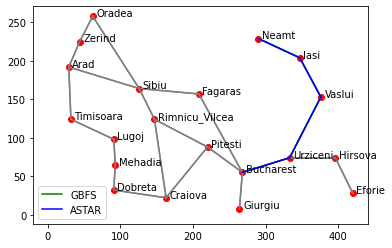

Masukan nomor KOTA ASAL (0 untuk keluar): 0


In [49]:
def Astar(startNode, heuristics, graph, goalNode="Bucharest"):
    priorityQueue = queue.PriorityQueue()
    distance = 0
    path = []
    priorityQueue.put((heuristics[startNode] + distance, [startNode, 0]))
    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]
        path.append(current[0])
        distance += int(current[1])
        if current[0] == goalNode:
            break
        priorityQueue = queue.PriorityQueue()
        for i in graph[current[0]]:
            if i[0] not in path:
                priorityQueue.put((heuristics[i[0]] + int(i[1]) + distance, i))
    return path
# drawing map of answer
def drawMap(city, gbfs, astar, graph):
    for i, j in city.items():
        plt.plot(j[0], j[1], "ro")
        plt.annotate(i, (j[0] + 5, j[1]))
        for k in graph[i]:
            n = city[k[0]]
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray")
    for i in range(len(gbfs)):
        try:
            first = city[gbfs[i]]
            secend = city[gbfs[i + 1]]
            plt.plot([first[0], secend[0]], [first[1], secend[1]], "green")
        except:
            continue
    for i in range(len(astar)):
        try:
            first = city[astar[i]]
            secend = city[astar[i + 1]]

            plt.plot([first[0], secend[0]], [first[1], secend[1]], "blue")
        except:
            continue
    plt.errorbar(1, 1, label="GBFS", color="green")
    plt.errorbar(1, 1, label="ASTAR", color="blue")
    plt.legend(loc="lower left")
    plt.show()
# running the program
def main():
    heuristic = getHeuristics()
    graph = createGraph()
    city, citiesCode = getCity()
    for i, j in citiesCode.items():
        print(i, j)
    while True:
        inputCode = int(input("Masukan nomor KOTA ASAL (0 untuk keluar): "))
        if inputCode == 0:
            break
        cityName = citiesCode[inputCode]
        gbfs = GBFS(cityName, heuristic, graph)
        astar = Astar(cityName, heuristic, graph)
        print("GBFS => ", gbfs)
        print("ASTAR => ", astar)
        drawMap(city, gbfs, astar, graph)
main()